In [1]:
!pip install -r requirements.txt

Looking in indexes: https://nexus.cnj.jus.br/repository/pypi-all/simple
You are using pip version 18.1, however version 21.2.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/home/emmanuel/.pyenv/versions/3.6.8/envs/cranium/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/emmanuel/.pyenv/versions/3.6.8/envs/cranium/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/emmanuel/.pyenv/versions/3.6.8/envs/cranium/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/emmanuel/.pyenv/versions/3.6.8/envs/cranium/lib/p

In [3]:
mpl.rcParams['figure.figsize']=(10,6)
mpl.rcParams['font.size'] = 22

In [4]:
passageiros = pd.read_csv('Passageiros.csv')

In [5]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


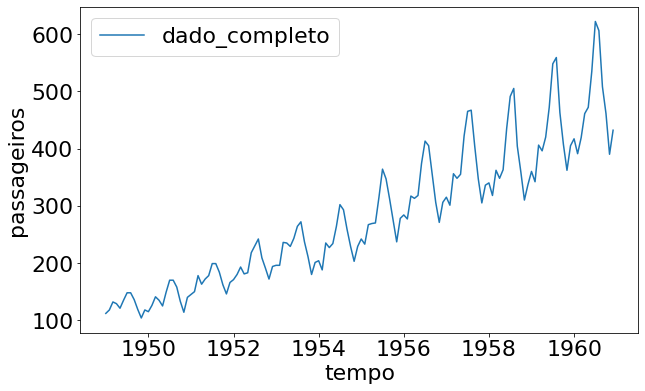

In [6]:
def plotar_dados(dados):
    sns.lineplot(x='tempo', y='passageiros', data=dados, label='dado_completo')
    
plotar_dados(passageiros)

In [7]:
sc = StandardScaler()
sc.fit(passageiros)
dado_escalado = sc.transform(passageiros)
dado_escalado

array([[-1.72006415, -1.40777884],
       [-1.69600731, -1.35759023],
       [-1.67195047, -1.24048348],
       [-1.64789363, -1.26557778],
       [-1.62383679, -1.33249593],
       [-1.59977995, -1.21538918],
       [-1.5757231 , -1.10664719],
       [-1.55166626, -1.10664719],
       [-1.52760942, -1.20702441],
       [-1.50355258, -1.34922546],
       [-1.47949574, -1.47469699],
       [-1.4554389 , -1.35759023],
       [-1.43138206, -1.38268454],
       [-1.40732522, -1.29067209],
       [-1.38326837, -1.16520057],
       [-1.35921153, -1.21538918],
       [-1.33515469, -1.29903686],
       [-1.31109785, -1.09828242],
       [-1.28704101, -0.9226223 ],
       [-1.26298417, -0.9226223 ],
       [-1.23892733, -1.02299951],
       [-1.21487049, -1.23211871],
       [-1.19081364, -1.3910493 ],
       [-1.1667568 , -1.17356534],
       [-1.14269996, -1.1317415 ],
       [-1.11864312, -1.08991766],
       [-1.09458628, -0.85570415],
       [-1.07052944, -0.98117567],
       [-1.0464726 ,

In [8]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

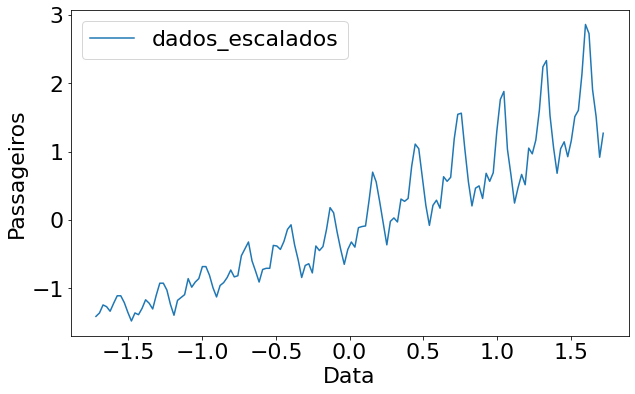

In [9]:
def plotar_eixos(x, y, label):
    sns.lineplot(x=x, y=y, label=label)
    plt.ylabel('Passageiros')
    plt.xlabel('Data')


plotar_eixos(x, y, 'dados_escalados')

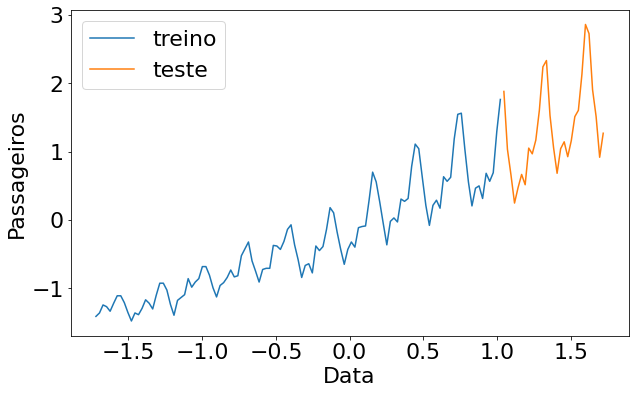

In [10]:
tamanho_treino = int(len(passageiros)*0.8)
tamanho_teste = int(len(passageiros)*0.2)

x_treino = x[0:tamanho_treino]
y_treino = y[0:tamanho_treino]
x_teste  = x[tamanho_treino:len(passageiros)]
y_teste = y[tamanho_treino:len(passageiros)]

plotar_eixos(x_treino, y_treino, 'treino')
plotar_eixos(x_teste, y_teste, 'teste')

In [21]:
def definir_modelo(hyperparams=[], loss='mean_squared_error', optimizer='adam'):
    
    modelo = Sequential()

    for i in range(0, len(hyperparams)):
        modelo.add(Dense(hyperparams[i]['dimensao_saida'],
                         input_dim=1,
                         activation=hyperparams[i]['activation'],
                         kernel_initializer = hyperparams[i]['kernel_initializer'],
                         use_bias=hyperparams[i]['use_bias']))

    modelo.compile(loss=loss,
                   metrics=['accuracy'],
                   optimizer=optimizer)

    modelo.summary()

    return modelo

In [23]:
def plotar_resultados(x, y):
    dados = {'tempo':x, 'passageiros': y[:,0]}
    resultados = pd.DataFrame(data=dados)
    resultados_inversos = sc.inverse_transform(resultados)
    x, y = resultados_inversos[:,0], resultados_inversos[:,1]
    plotar_eixos(x, y, 'predições')

In [38]:
def testar_modelo(hyperparams, epocas_treino=5):
    modelo = definir_modelo(hyperparams)
    modelo.fit(x_treino, y_treino, epochs=epocas_treino)
    y_predict = modelo.predict(x_treino)
    y_predict_teste = modelo.predict(x_teste)
    plotar_dados(passageiros)
    plotar_resultados(x_treino, y_predict)
    plotar_resultados(x_teste, y_predict_teste)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
115/115 [==============================] - 0s 424us/sample - loss: 0.1017 - acc: 0.0000e+00
Epoch 2/5
115/115 [==============================] - 0s 42us/sample - loss: 0.1009 - acc: 0.0000e+00
Epoch 3/5
115/115 [==============================] - 0s 42us/sample - loss: 0.1005 - acc: 0.0000e+00
Epoch 4/5
115/115 [==============================] - 0s 38us/sample - loss: 0.1000 - acc: 0.0000e+00
Epoch 5/5
115/115 [==============================] - 0s 47us/sample - loss: 0.0995 - acc: 0.0000e+00


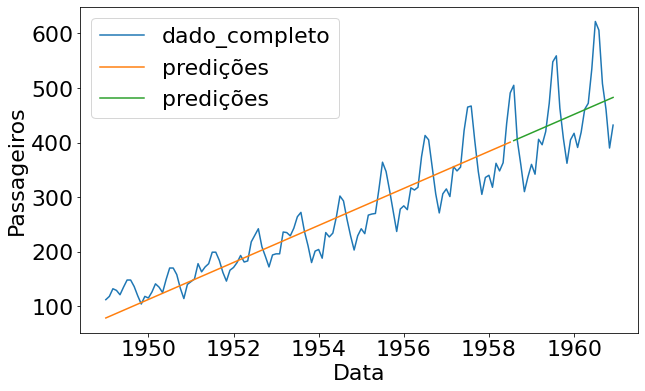

In [39]:
hyperparams_1=[{
    
    'dimensao_saida':1,
    'activation':'linear',
    'kernel_initializer':'Ones',
    'use_bias':True,    
}]

testar_modelo(hyperparams_1)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
115/115 [==============================] - 0s 409us/sample - loss: 0.1016 - acc: 0.0000e+00
Epoch 2/5
115/115 [==============================] - 0s 45us/sample - loss: 0.1010 - acc: 0.0000e+00
Epoch 3/5
115/115 [==============================] - 0s 35us/sample - loss: 0.1004 - acc: 0.0000e+00
Epoch 4/5
115/115 [==============================] - 0s 40us/sample - loss: 0.0998 - acc: 0.0000e+00
Epoch 5/5
115/115 [==============================] - 0s 43us/sample - loss: 0.0993 - acc: 0.0000e+00


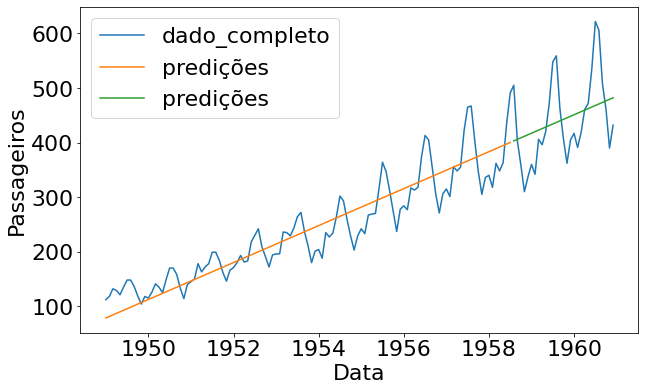

In [40]:
hyperparams_2=[{
    
    'dimensao_saida':1,
   'activation':'linear',
    'kernel_initializer':'Ones',
    'use_bias':False,
    
}]

testar_modelo(hyperparams_2)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 8)                 8         
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 64        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
115/115 [==============================] - 0s 483us/sample - loss: 0.6924 - acc: 0.0000e+00
Epoch 2/100
115/115 [==============================] - 0s 50us/sample - loss: 0.6919 - acc: 0.0000e+00
Epoch 3/100
115/115 [==============================] - 0s 41us/sample - loss: 0.6912 - acc: 0.0000e+00
Epoch 4/100
115/115 [==============================] - 0s 52us/sample - loss:

115/115 [==============================] - 0s 47us/sample - loss: 0.0925 - acc: 0.0000e+00
Epoch 73/100
115/115 [==============================] - 0s 50us/sample - loss: 0.0925 - acc: 0.0000e+00
Epoch 74/100
115/115 [==============================] - 0s 50us/sample - loss: 0.0926 - acc: 0.0000e+00
Epoch 75/100
115/115 [==============================] - 0s 55us/sample - loss: 0.0925 - acc: 0.0000e+00
Epoch 76/100
115/115 [==============================] - 0s 48us/sample - loss: 0.0925 - acc: 0.0000e+00
Epoch 77/100
115/115 [==============================] - 0s 51us/sample - loss: 0.0925 - acc: 0.0000e+00
Epoch 78/100
115/115 [==============================] - 0s 41us/sample - loss: 0.0926 - acc: 0.0000e+00
Epoch 79/100
115/115 [==============================] - 0s 52us/sample - loss: 0.0926 - acc: 0.0000e+00
Epoch 80/100
115/115 [==============================] - 0s 36us/sample - loss: 0.0925 - acc: 0.0000e+00
Epoch 81/100
115/115 [==============================] - 0s 45us/sample - loss

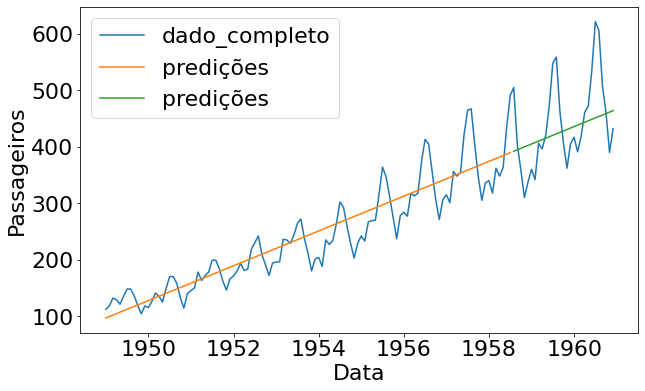

In [42]:
hyperparams_3 = [{
    
    'dimensao_saida':8,
   'activation':'linear',
    'kernel_initializer':'random_uniform',
    'use_bias':False,
    
},


{
    'dimensao_saida':8,
   'activation':'linear',
    'kernel_initializer':'random_uniform',
    'use_bias':False,
    
},
    
    {
    'dimensao_saida':1,
    'activation':'linear',
    'kernel_initializer':'random_uniform',
    'use_bias':False,
    
}



]

testar_modelo(hyperparams_3, epocas_treino=100)